## **Load Libraires**

In [1]:
import pandas as pd
from intervals import IntervalFit
from histogram import histogram
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
bmw = pd.read_csv('C:/Users/PC/Desktop/Car-Sales/data/cars_sales2.csv')
bmw = bmw.query("manufacturer == 'BMW'")

In [4]:
bmw.model.unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' X1', ' M4', ' X6',
       ' Z4', ' X7', ' X2', ' M5', ' i8', ' M2', ' i3', ' 8 Series',
       ' M3'], dtype=object)

In [5]:
bmw.price.describe()

count      8899.000000
mean      21124.953927
std       10418.431407
min        2350.000000
25%       14094.500000
50%       18980.000000
75%       25287.500000
max      123456.000000
Name: price, dtype: float64

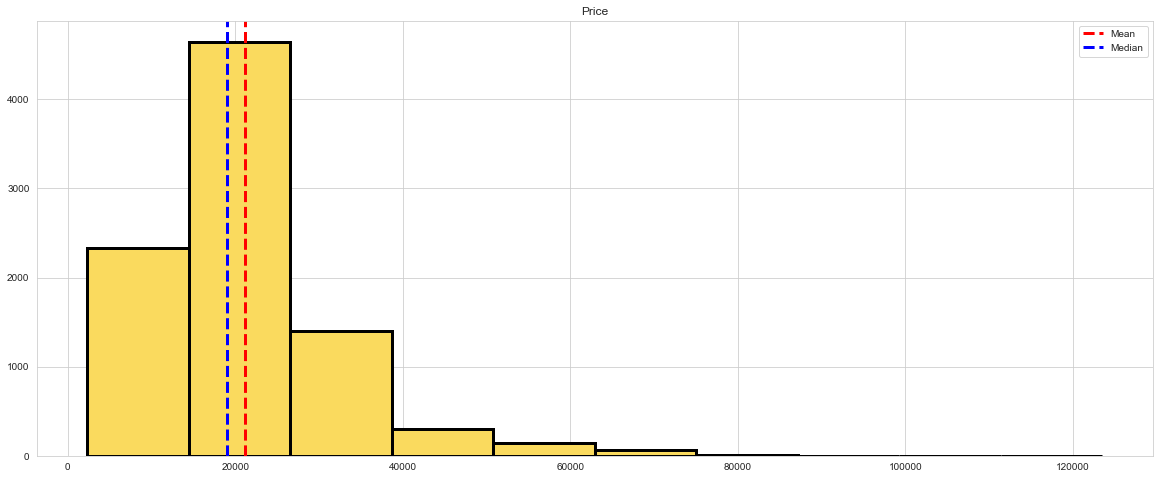

In [6]:
_ = histogram(bmw.price,"Price")

In [7]:
IntervalFit(bmw.price).Lower_Interval()

Interval range STD 1.5: 5498.0
Interval range STD 2: 289.0
Interval range STD 2.5: -4920.0
Interval range STD 3.0: -10129.0
Interval range STD 3.5: -15338.0
Interval range STD 4: -20546.0


The first lower interval seems to me to be a good minimum value, since BMW is not characterized by the low price of vehicles.

In [8]:
IntervalFit(bmw.price).Upper_Interval()

Interval range STD 1.5: 36752.0
Interval range STD 2: 41961.0
Interval range STD 2.5: 47170.0
Interval range STD 3.0: 52378.0
Interval range STD 3.5: 57587.0
Interval range STD 4: 62796.0


In [9]:
bmw.query("price > 62000").sort_values(by = "price",ascending = False).head(5)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
51524,2 Series,2015,123456,Semi-Auto,33419,Diesel,2.0,BMW
49326,8 Series,2019,84898,Semi-Auto,3185,Petrol,4.4,BMW
50785,X7,2020,78490,Semi-Auto,4919,Diesel,3.0,BMW
48892,X7,2020,78000,Semi-Auto,5000,Diesel,3.0,BMW
54213,X7,2020,77995,Semi-Auto,7500,Diesel,3.0,BMW


In the EDA we realized that the average price of the BMW X7 models is higher, perhaps the first 2 cars may be outliers.

In [10]:
bmw.query("model == ' 2 Series'").sort_values(by = "price",ascending = False).head(5)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
51524,2 Series,2015,123456,Semi-Auto,33419,Diesel,2.0,BMW
56587,2 Series,2020,37989,Automatic,3890,Petrol,2.0,BMW
49058,2 Series,2020,36000,Semi-Auto,5550,Petrol,2.0,BMW
55309,2 Series,2020,35950,Automatic,4597,Petrol,2.0,BMW
56091,2 Series,2020,34988,Automatic,5000,Petrol,2.0,BMW


In [11]:
bmw.query("model == ' 8 Series'").sort_values(by = "price",ascending = False).head(5)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
49326,8 Series,2019,84898,Semi-Auto,3185,Petrol,4.4,BMW
52746,8 Series,2020,74995,Semi-Auto,4500,Diesel,3.0,BMW
53801,8 Series,2019,73890,Semi-Auto,3369,Petrol,4.4,BMW
49504,8 Series,2019,72990,Semi-Auto,8200,Petrol,4.4,BMW
49324,8 Series,2019,69898,Automatic,4075,Petrol,3.0,BMW


They are indeed atypical values, since there is a big difference between both models with similar characteristics.

In [12]:
bmw = bmw.query("price > 5500 and   price < 79000")

In [13]:
bmw.query("price > 62000").sort_values(by = "price",ascending = False).head(5)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
50785,X7,2020,78490,Semi-Auto,4919,Diesel,3.0,BMW
48892,X7,2020,78000,Semi-Auto,5000,Diesel,3.0,BMW
54213,X7,2020,77995,Semi-Auto,7500,Diesel,3.0,BMW
50746,X7,2020,77990,Semi-Auto,5656,Diesel,3.0,BMW
50748,X7,2019,77880,Semi-Auto,6506,Diesel,3.0,BMW


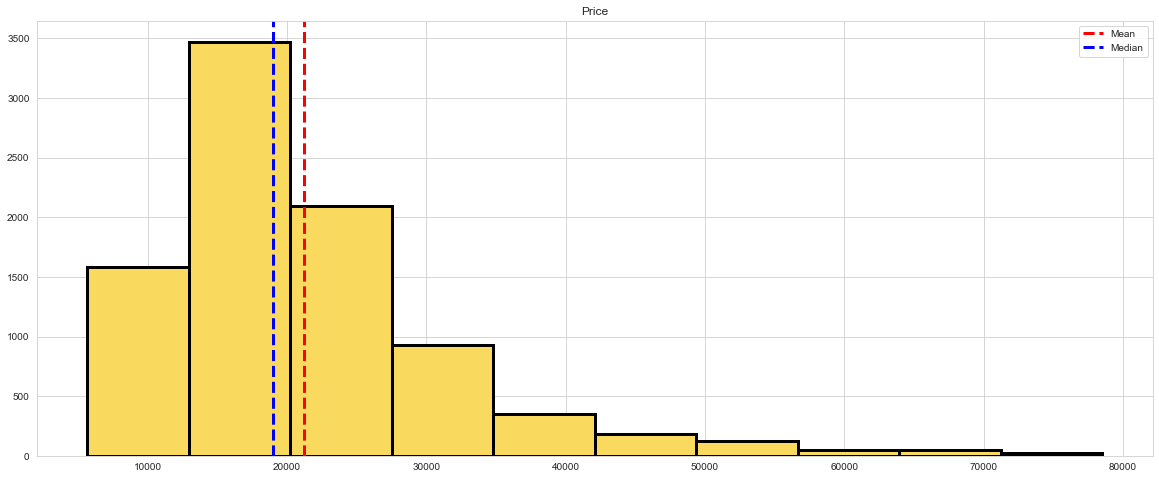

In [14]:
_ = histogram(bmw.price,"Price")

In [15]:
bmw.query("model == ' X7' and year == 2020").sort_values(by = "price",ascending = False).head(15)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
50785,X7,2020,78490,Semi-Auto,4919,Diesel,3.0,BMW
48892,X7,2020,78000,Semi-Auto,5000,Diesel,3.0,BMW
54213,X7,2020,77995,Semi-Auto,7500,Diesel,3.0,BMW
50746,X7,2020,77990,Semi-Auto,5656,Diesel,3.0,BMW
52941,X7,2020,72000,Semi-Auto,3116,Diesel,3.0,BMW
...,...,...,...,...,...,...,...,...
50789,X7,2020,69990,Semi-Auto,5087,Diesel,3.0,BMW
56072,X7,2020,66988,Automatic,5000,Diesel,3.0,BMW
53475,X7,2020,64999,Semi-Auto,4000,Diesel,3.0,BMW
51922,X7,2020,64995,Semi-Auto,3452,Diesel,3.0,BMW


It seems strange to me that a model with quite similar characteristics has a difference of 7k GBP.

In [16]:
bmw = bmw.query("price < 70000")

In [17]:
bmw.query("model == ' X7'").sort_values(by = "price",ascending = False).head(10)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
52206,X7,2019,69995,Semi-Auto,4997,Diesel,3.0,BMW
54165,X7,2019,69995,Semi-Auto,5283,Diesel,3.0,BMW
50789,X7,2020,69990,Semi-Auto,5087,Diesel,3.0,BMW
56924,X7,2019,69880,Automatic,3980,Diesel,3.0,BMW
49244,X7,2019,68898,Automatic,5203,Petrol,3.0,BMW
53937,X7,2019,68720,Semi-Auto,5000,Diesel,3.0,BMW
51079,X7,2019,67990,Semi-Auto,6331,Petrol,3.0,BMW
54065,X7,2019,67989,Semi-Auto,17561,Petrol,3.0,BMW
53813,X7,2019,67986,Automatic,5825,Petrol,3.0,BMW
56757,X7,2019,67950,Automatic,15000,Diesel,3.0,BMW


In [18]:
x7 = bmw.query("model == ' X7'")
x7_2019 = x7.query("model == ' X7' and year == 2019")
x7_2020 = x7.query("model == ' X7' and year == 2020")

In [19]:
x7 = x7.query("year != 2019 and year != 2020")
bmw_other_models = bmw.query("model != ' X7'")

In [20]:
x7_2019.sort_values(by = "price",ascending = False).head(6)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
54165,X7,2019,69995,Semi-Auto,5283,Diesel,3.0,BMW
52206,X7,2019,69995,Semi-Auto,4997,Diesel,3.0,BMW
56924,X7,2019,69880,Automatic,3980,Diesel,3.0,BMW
49244,X7,2019,68898,Automatic,5203,Petrol,3.0,BMW
53937,X7,2019,68720,Semi-Auto,5000,Diesel,3.0,BMW
51079,X7,2019,67990,Semi-Auto,6331,Petrol,3.0,BMW


In [21]:
x7_2020.sort_values(by = "price",ascending = False).head(6)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
50789,X7,2020,69990,Semi-Auto,5087,Diesel,3.0,BMW
56072,X7,2020,66988,Automatic,5000,Diesel,3.0,BMW
53475,X7,2020,64999,Semi-Auto,4000,Diesel,3.0,BMW
51922,X7,2020,64995,Semi-Auto,3452,Diesel,3.0,BMW
50759,X7,2020,63990,Semi-Auto,6137,Diesel,3.0,BMW


Most of the X7 models of the year 2019 have a higher price than the 2020 models, something that is illogical, since generally the most recent model is always more expensive, being the same model of the vehicle.

In [22]:
x7_2019 = x7_2019.query("price < 62000")

In [23]:
x7_2019

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
54235,X7,2019,61875,Semi-Auto,5071,Diesel,3.0,BMW
55464,X7,2019,59988,Automatic,7791,Diesel,3.0,BMW


In [24]:
x7_2020

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
50759,X7,2020,63990,Semi-Auto,6137,Diesel,3.0,BMW
50789,X7,2020,69990,Semi-Auto,5087,Diesel,3.0,BMW
51922,X7,2020,64995,Semi-Auto,3452,Diesel,3.0,BMW
53475,X7,2020,64999,Semi-Auto,4000,Diesel,3.0,BMW
56072,X7,2020,66988,Automatic,5000,Diesel,3.0,BMW


In [25]:
x7 = pd.concat([x7,x7_2019,x7_2020])

In [26]:
bmw = pd.concat([bmw_other_models,x7])

In [27]:
bmw.query("model == ' X7'").sort_values(by = "price",ascending = False).head(10)

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
50789,X7,2020,69990,Semi-Auto,5087,Diesel,3.0,BMW
56072,X7,2020,66988,Automatic,5000,Diesel,3.0,BMW
53475,X7,2020,64999,Semi-Auto,4000,Diesel,3.0,BMW
51922,X7,2020,64995,Semi-Auto,3452,Diesel,3.0,BMW
50759,X7,2020,63990,Semi-Auto,6137,Diesel,3.0,BMW
54235,X7,2019,61875,Semi-Auto,5071,Diesel,3.0,BMW
55464,X7,2019,59988,Automatic,7791,Diesel,3.0,BMW


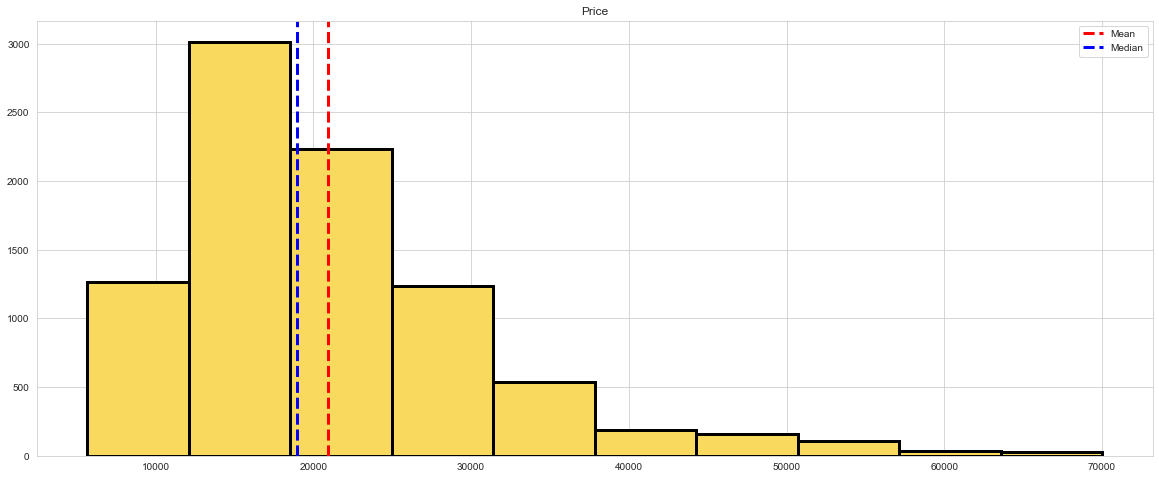

In [28]:
_ = histogram(bmw.price,"Price")

Better data cleaning is appreciated.

### *Save Dataset Clear*

In [29]:
bmw.to_csv('C:/Users/PC/Desktop/Car-Sales/data/bmw_clear.csv',index = False)